In [258]:
import os
import string
import pandas as pd
import numpy as np
from string import digits
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Layer
from tensorflow.keras.models import Model

# Get Dataset

In [259]:
if os.path.exists("/content/indonlg"):
  print("Repository has been downloaded!")
else :
  !git clone https://github.com/IndoNLP/indonlg

Repository has been downloaded!


In [260]:
train_data = pd.read_json('/content/indonlg/dataset/MT_JAVNRF_INZNTV/train_preprocess.json')
test_data = pd.read_json('/content/indonlg/dataset/MT_JAVNRF_INZNTV/test_preprocess.json')

In [261]:
train_data.drop(columns='id', inplace=True)
test_data.drop(columns='id', inplace=True)

In [262]:
train_data.head()

,text,label
0,"Wong kabèh padha gumun, temah padha takon-tin...","Mereka semua takjub, sehingga mereka memperbin..."
1,"Saka ing tutuké metu pedhang kang landhep, ka...",Dan dari mulut-Nya keluarlah sebilah pedang ta...
2,Déné kowé padha diawas! Aku wus ngandhakake...,Hati-hatilah kamu! Aku sudah terlebih dahulu m...
3,"supaya didhaftaraké bebarengan karo Maria, pa...","supaya didaftarkan bersama-sama dengan Maria, ..."
4,Allah sampun mungokaken Panjenenganipun saking...,Allah telah membangkitkan Dia dari antara oran...


In [263]:
test_data.head()

,text,label
0,"Nalika samana Hérodès, raja-wilayah, midhang...",Pada masa itu sampailah berita-berita tentang ...
1,"""Lan ing salebeting kawontenan ingkang makaten...","""Dan dalam keadaan demikian, ketika aku dengan..."
2,Margi saking punika panjenenganipun uninga sad...,Karena itu ia telah melihat ke depan dan telah...
3,Sih-rahmat nunggila ing kowé kabèh.,Kasih karunia menyertai kamu sekalian.
4,nganggo tanganku dhéwé aku nindakaké pagawe...,kami melakukan pekerjaan tangan yang berat. Ka...


# Data Preprocessing

In [264]:
import nltk
nltk.download("punkt")
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [265]:
javanese_stopwords = pd.read_csv("local_languages_stopwords.csv")
javanese_stopwords.head()

,indonesian,javanese,sundanese
0,ada,Ana,Aya
1,adalah,yaiku,geus
2,adanya,orane,ayana
3,adapun,Kangge,Samentara éta
4,agak,Luwih,rada


In [266]:
#remove sundanese column
javanese_stopwords.drop(columns=["indonesian", "sundanese"], inplace=True)
javanese_stopwords.head()

,javanese
0,Ana
1,yaiku
2,orane
3,Kangge
4,Luwih


In [267]:
javanese_stopwords = javanese_stopwords['javanese'].tolist()
javanese_stopwords

['Ana',
 'yaiku',
 'orane',
 'Kangge',
 'Luwih',
 'Dianggo',
 'dadi ngono',
 'bakal',
 'bakal',
 'pungkasan',
 'pungkasan',
 'Pungkasane',
 'Aku',
 'kula',
 'banget',
 'Banget',
 'Sampeyan',
 'Sampeyan',
 'antarane',
 'antarane',
 'Antarane wong-wong mau',
 'Apa',
 'Apa',
 'Yen',
 'yaiku',
 'utamane',
 'Akatah',
 'Tegese',
 'Asal',
 'diwenehake',
 'ing',
 'utawa',
 'utawa iku',
 'utawa',
 'diwiwiti',
 'Wiwitane',
 'kaya',
 'kaya',
 'Kepiye',
 'Kepiye',
 'Nanging',
 'kanggo',
 'bagean',
 'Malah',
 'iku',
 'iku',
 'Apik',
 'bakal',
 'arep',
 'teka maneh',
 'Akeh',
 'Rama',
 'Anyar',
 'ngisor',
 'nomer saka',
 'Katon',
 'iki',
 'Kajaba iku',
 'Iki carane',
 'dadi',
 'Kajaba iku',
 'Iku iku',
 'Kajaba iku',
 'Nyambut gawe',
 'konco',
 'Mengko',
 'Durung',
 'durung',
 'Bener',
 'Iku bener',
 'Bener',
 'ana ing',
 'pungkasan',
 'pungkasan',
 'rampung',
 'Wonten pinten',
 'Apa',
 'Apa sing sampeyan lakoni',
 'apa wae',
 'Tegese',
 'Miwiti',
 'Macem-macem',
 'Tiba',
 'Menehi',
 'menehi',
 'Dip

In [268]:
nltk.download('stopwords', quiet=True)
indonesian_stopwords = stopwords.words('indonesian')

In [269]:
indonesian_stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [270]:
def preprocess_text(text, language_label):
    #lowercase
    text = text.lower()
    #remove quotes
    text = text.strip('"')
    # Combine removing special characters, punctuation, and extra whitespace
    text = re.sub(r"[^\w\s]", "", text)  # Removes special characters
    text = "".join([char for char in text if char not in punctuation])  # Removes punctuation
    text = " ".join(text.split())  # Removes extra whitespace
    #Tokenize
    tokens = word_tokenize(text)

    # Select stopwords based on language label
    if language_label == "label":
        stopwords = indonesian_stopwords
    elif language_label == "text":
        stopwords = javanese_stopwords
    else:
        # Default to empty set if language label is not recognized
        stopwords = set()

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords]


    # Join the tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text


In [271]:
train_data['label'] = train_data['label'].apply(lambda x: preprocess_text(x, indonesian_stopwords))
train_data['text'] = train_data['text'].apply(lambda x: preprocess_text(x, javanese_stopwords))

In [272]:
test_data['label'] = test_data['label'].apply(lambda x: preprocess_text(x, indonesian_stopwords))
test_data['text'] = test_data['text'].apply(lambda x: preprocess_text(x, javanese_stopwords))

In [273]:
train_data.head()

,text,label
0,wong kabeh padha gumun temah padha takontinako...,mereka semua takjub sehingga mereka memperbinc...
1,saka ing tutuke metu pedhang kang landhep kang...,dan dari mulutnya keluarlah sebilah pedang taj...
2,dene kowe padha diawas aku wus ngandhakake iki...,hatihatilah kamu aku sudah terlebih dahulu men...
3,supaya didhaftarake bebarengan karo maria paca...,supaya didaftarkan bersamasama dengan maria tu...
4,allah sampun mungokaken panjenenganipun saking...,allah telah membangkitkan dia dari antara oran...


In [274]:
train_data.isnull().sum()

,0
text,0
label,0


# Get Vocab

In [275]:
# Add start and end tokens to target sequences
train_data['text'] = train_data['text'].apply(lambda x : 'START_ '+ x + ' _END')
test_data['text'] = test_data['text'].apply(lambda x : 'START_ '+ x + ' _END')

In [276]:
train_data.head()

,text,label
0,START_ wong kabeh padha gumun temah padha tako...,mereka semua takjub sehingga mereka memperbinc...
1,START_ saka ing tutuke metu pedhang kang landh...,dan dari mulutnya keluarlah sebilah pedang taj...
2,START_ dene kowe padha diawas aku wus ngandhak...,hatihatilah kamu aku sudah terlebih dahulu men...
3,START_ supaya didhaftarake bebarengan karo mar...,supaya didaftarkan bersamasama dengan maria tu...
4,START_ allah sampun mungokaken panjenenganipun...,allah telah membangkitkan dia dari antara oran...


In [277]:
test_data.head()

,text,label
0,START_ nalika samana herodes rajawilayah midha...,pada masa itu sampailah beritaberita tentang y...
1,START_ lan ing salebeting kawontenan ingkang m...,dan dalam keadaan demikian ketika aku dengan k...
2,START_ margi saking punika panjenenganipun uni...,karena itu ia telah melihat ke depan dan telah...
3,START_ sihrahmat nunggila ing kowe kabeh _END,kasih karunia menyertai kamu sekalian
4,START_ nganggo tanganku dhewe aku nindakake pa...,kami melakukan pekerjaan tangan yang berat kal...


In [278]:
all_ind_words=set()
for ind in train_data['label']:
    for word in ind.split():
        if word not in all_ind_words:
            all_ind_words.add(word)

all_javanese_words=set()
for jav in train_data['text']:
    for word in jav.split():
        if word not in all_javanese_words:
            all_javanese_words.add(word)

In [279]:
len(all_ind_words)

6758

In [280]:
len(all_javanese_words)

9575

In [281]:
train_data['length_jav_sentence']=train_data['text'].apply(lambda x:len(x.split(" ")))
train_data['length_ind_sentence']=train_data['label'].apply(lambda x:len(x.split(" ")))

In [282]:
test_data['length_jav_sentence']=test_data['text'].apply(lambda x:len(x.split(" ")))
test_data['length_ind_sentence']=test_data['label'].apply(lambda x:len(x.split(" ")))

In [283]:
train_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ wong kabeh padha gumun temah padha tako...,mereka semua takjub sehingga mereka memperbinc...,31,24
1,START_ saka ing tutuke metu pedhang kang landh...,dan dari mulutnya keluarlah sebilah pedang taj...,36,34
2,START_ dene kowe padha diawas aku wus ngandhak...,hatihatilah kamu aku sudah terlebih dahulu men...,14,11
3,START_ supaya didhaftarake bebarengan karo mar...,supaya didaftarkan bersamasama dengan maria tu...,11,9
4,START_ allah sampun mungokaken panjenenganipun...,allah telah membangkitkan dia dari antara oran...,42,39


In [284]:
test_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ nalika samana herodes rajawilayah midha...,pada masa itu sampailah beritaberita tentang y...,10,11
1,START_ lan ing salebeting kawontenan ingkang m...,dan dalam keadaan demikian ketika aku dengan k...,23,19
2,START_ margi saking punika panjenenganipun uni...,karena itu ia telah melihat ke depan dan telah...,34,31
3,START_ sihrahmat nunggila ing kowe kabeh _END,kasih karunia menyertai kamu sekalian,7,5
4,START_ nganggo tanganku dhewe aku nindakake pa...,kami melakukan pekerjaan tangan yang berat kal...,23,16


In [285]:
# Max length = 20
# train_data=train_data[train_data['length_ind_sentence']<=20]
# train_data=train_data[train_data['length_jav_sentence']<=20]

In [286]:
# Max length = 20
# test_data=test_data[test_data['length_ind_sentence']<=20]
# test_data=test_data[test_data['length_jav_sentence']<=20]

In [287]:
maxlength = max(train_data['length_jav_sentence'])

In [288]:
#Check Max Length
print("maximum length Javanese Sentence ",max(train_data['length_jav_sentence']))
print("maximum length Indonesian Sentence ",max(train_data['length_ind_sentence']))

maximum length Javanese Sentence  68
maximum length Indonesian Sentence  66


In [289]:
#Check Max Length
print("maximum length Javanese Sentence ",max(test_data['length_jav_sentence']))
print("maximum length Indonesian Sentence ",max(test_data['length_ind_sentence']))

maximum length Javanese Sentence  60
maximum length Indonesian Sentence  52


In [290]:
max_length_src=max(train_data['length_jav_sentence'])
max_length_tar=max(train_data['length_ind_sentence'])

In [291]:
max_length_src_test=max(test_data['length_jav_sentence'])
max_length_tar_test=max(test_data['length_ind_sentence'])

In [292]:
input_words = sorted(list(all_ind_words))
target_words = sorted(list(all_javanese_words))
num_encoder_tokens = len(all_ind_words)
num_decoder_tokens = len(all_javanese_words)
num_encoder_tokens, num_decoder_tokens

(6758, 9575)

In [293]:
num_decoder_tokens += 1 #for zero padding

In [294]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [295]:
input_token_index

{'abadi': 1,
 'abadon': 2,
 'abaikan': 3,
 'abba': 4,
 'abia': 5,
 'abihud': 6,
 'abilene': 7,
 'abraham': 8,
 'abu': 9,
 'abyatar': 10,
 'ada': 11,
 'adakah': 12,
 'adalah': 13,
 'adam': 14,
 'adanya': 15,
 'adapun': 16,
 'adat': 17,
 'adi': 18,
 'adikmu': 19,
 'adiknya': 20,
 'adil': 21,
 'adilkah': 22,
 'adilnya': 23,
 'admin': 24,
 'adonan': 25,
 'adramitium': 26,
 'agabus': 27,
 'agak': 28,
 'agaknya': 29,
 'agama': 30,
 'agamamu': 31,
 'agar': 32,
 'agripa': 33,
 'agung': 34,
 'agustus': 35,
 'ahas': 36,
 'ahli': 37,
 'ahliahli': 38,
 'aib': 39,
 'aibku': 40,
 'ainon': 41,
 'air': 42,
 'airnya': 43,
 'ajaib': 44,
 'ajakan': 45,
 'ajar': 46,
 'ajaran': 47,
 'ajaranajaran': 48,
 'ajaranku': 49,
 'ajaranmu': 50,
 'ajarannya': 51,
 'ajari': 52,
 'ajarkan': 53,
 'ajarkanlah': 54,
 'ajarlah': 55,
 'akal': 56,
 'akan': 57,
 'akar': 58,
 'akarakarnya': 59,
 'akhaikus': 60,
 'akhaya': 61,
 'akhir': 62,
 'akhirnya': 63,
 'akibat': 64,
 'akibatnya': 65,
 'akil': 66,
 'aku': 67,
 'akui': 68,

In [296]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [297]:
train_data = shuffle(train_data)
train_data.head()

,text,label,length_jav_sentence,length_ind_sentence
2748,START_ padha ngedohana laku cabul sarupaning d...,jauhkanlah dirimu dari percabulan setiap dosa ...,28,23
930,START_ nanging abraham mangsuli pangandikane a...,tetapi abraham berkata anak ingatlah bahwa eng...,34,27
3658,START_ nanging sakabate yesus kang aran yudas ...,tetapi yudas iskariot seorang dari muridmurid ...,15,13
1498,START_ anadene wongwong iku bakal padha lumebu...,dan mereka ini akan masuk ke tempat siksaan ya...,22,18
5387,START_ menawa kowe wis ndherek mati bareng kar...,apabila kamu telah mati bersamasama dengan kri...,32,25


In [298]:
test_data = shuffle(test_data)
test_data.head()

,text,label,length_jav_sentence,length_ind_sentence
925,START_ sabab sakehing nabi lan kitab toret iku...,sebab semua nabi dan kitab taurat bernubuat hi...,14,10
437,START_ sanadyan mangkono saiba becike menawa w...,namun demikian alangkah baiknya kalau semua or...,28,26
696,START_ sarta munjuk kawula sami saos sokur dhu...,sambil berkata kami mengucap syukur kepadamu y...,35,30
53,START_ nuli nyungkemi sampeyane yesus ngunjuka...,lalu tersungkur di depan kaki yesus dan menguc...,12,15
380,START_ bareng wis esuk pangareping imam kabeh ...,ketika hari mulai siang semua imam kepala dan ...,21,18


In [299]:
# Combine the DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

In [300]:
combined_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ padha ngedohana laku cabul sarupaning d...,jauhkanlah dirimu dari percabulan setiap dosa ...,28,23
1,START_ nanging abraham mangsuli pangandikane a...,tetapi abraham berkata anak ingatlah bahwa eng...,34,27
2,START_ nanging sakabate yesus kang aran yudas ...,tetapi yudas iskariot seorang dari muridmurid ...,15,13
3,START_ anadene wongwong iku bakal padha lumebu...,dan mereka ini akan masuk ke tempat siksaan ya...,22,18
4,START_ menawa kowe wis ndherek mati bareng kar...,apabila kamu telah mati bersamasama dengan kri...,32,25


# Tokenizer

In [301]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

# prepare english tokenizer
java_tokenizer = tokenization(combined_data.text)
java_vocab_size = len(java_tokenizer.word_index) + 1

java_length = maxlength
print('Java Vocabulary Size: %d' % java_vocab_size)

# prepare indo tokenizer
indo_tokenizer = tokenization(combined_data.label)
indo_vocab_size = len(indo_tokenizer.word_index) + 1

indo_length = maxlength
print('indo Vocabulary Size: %d' % indo_vocab_size)

Java Vocabulary Size: 10460
indo Vocabulary Size: 7275


In [302]:
print(java_tokenizer.texts_to_sequences(combined_data.text[:1]))
print(java_tokenizer.texts_to_sequences(combined_data.text[1:2]))

[[1, 4, 2434, 361, 780, 618, 101, 108, 3, 1257, 8, 6, 1452, 1356, 1738, 18, 8, 3, 136, 361, 780, 6, 689, 101, 9, 1738, 62, 2]]
[[1, 18, 252, 362, 84, 1122, 958, 43, 11, 29, 244, 131, 3, 100, 877, 781, 18, 1002, 244, 131, 3, 12, 100, 119, 8, 6, 244, 806, 70, 11, 248, 300, 115, 2]]


In [303]:
X = encode_sequences(java_tokenizer, maxlength, combined_data.text)
y = encode_sequences(indo_tokenizer, maxlength, combined_data.label)

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((5728, 68), (1433, 68))

In [305]:
X_train[0:2]

array([[   1,   58,  113,  173,    8,   64,    6,   15,   42,   17,  421,
         277, 1971,   70,   52,  127,   67,  726,   73, 5004,   41,  110,
         130, 2038,   70,   52,   67, 1160,   73,   48, 3521, 2884,   39,
        9315,   82,   41,  342, 3542,  730,  143,  575,  572, 1977,   48,
        3521,  174,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   1,  261,    7,  368,   14,   21,  124,   27,    7,   14,   46,
          22,   50,  819,    5,   11,   25,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]], dtype=int32)

In [306]:
y_train[0]

array([ 134,   53,   10,   52,    3,   30,   26,  117,   10,  253,  276,
          7,  562,   71, 6586,    3,    1,  276,    7, 1241,   28,  638,
         28,  376,   10,   33,  313,   20,  188,   67, 2831,   28,   64,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

# Save data to PKL

In [307]:
# X_train.to_pickle('X_train.pkl')
# X_test.to_pickle('X_test.pkl')

In [308]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# Encoder Decoder

In [309]:
latent_dim=300

In [310]:
# Encoder
encoder_inputs = Input(shape=[maxlength])
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

encoder_states = [state_h, state_c]

In [311]:
# Attention
# https://colab.research.google.com/drive/1XrjPL3O_szhahYZW0z9yhCl9qvIcJJYW

import tensorflow as tf
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [312]:
# Decoder

decoder_inputs = Input(shape=[maxlength])
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)

# Using Attention Layer
attention_layer = AttentionLayer()
attention_result, attention_weights = attention_layer([encoder_outputs, decoder_outputs])

# Concat attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attention_result])

decoder_dense = Dense(indo_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'attention_layer_4' (of type AttentionLayer) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [313]:
def masked_accuracy(y_true, y_pred):
    # Reshape y_true if it's 3D
    if len(K.int_shape(y_true)) == 3:
        y_true = tf.squeeze(y_true, axis=-1)

    # Create mask to ignore padding tokens
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))

    # Get accuracy
    accuracies = tf.equal(tf.cast(y_true, dtype=tf.int64),
                          tf.cast(tf.argmax(y_pred, axis=-1), dtype=tf.int64))

    # Apply mask
    accuracies = tf.math.logical_and(mask, accuracies)

    # Calculate accuracy
    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

# def masked_f1_score(y_true, y_pred):
#     # Reshape y_true if it's 3D
#     if len(K.int_shape(y_true)) == 3:
#         y_true = tf.squeeze(y_true, axis=-1)

#     # Create mask to ignore padding tokens
#     mask = tf.math.logical_not(tf.math.equal(y_true, 0))
#     mask = tf.cast(mask, dtype=tf.float32)

#     # Get predicted classes
#     y_pred_classes = tf.cast(tf.argmax(y_pred, axis=-1), dtype=tf.int64)

#     # Calculate true positives, false positives, and false negatives
#     y_true = tf.cast(y_true, dtype=tf.int64)
#     tp = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, y_pred_classes), mask), dtype=tf.float32))
#     fp = tf.reduce_sum(tf.cast(tf.logical_and(tf.not_equal(y_true, y_pred_classes), mask), dtype=tf.float32))
#     fn = tf.reduce_sum(tf.cast(tf.logical_and(tf.logical_and(tf.not_equal(y_true, y_pred_classes), tf.not_equal(y_true, 0)), mask), dtype=tf.float32))

#     # Calculate precision and recall
#     precision = tp / (tp + fp + K.epsilon())
#     recall = tp / (tp + fn + K.epsilon())

#     # Calculate F1 score
#     f1_score = 2 * precision * recall / (precision + recall + K.epsilon())

#     return f1_score


In [314]:
model.compile(optimizer=tf.keras.optimizers.AdamW(), loss='sparse_categorical_crossentropy',metrics=[masked_accuracy])

In [315]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 68)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_8             │ (None, 68)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 68, 300)        │      2,027,400 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_7 (NotEqual)    │ (None, 68)             │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, 68, 300)        │      2,872,800 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ [(None, 68, 300),      │        721,200 │ embedding_7[0][0],     │
│                           │ (None, 300), (None,    │                │ not_equal_7[0][0]      │
│                           │ 300)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ [(None, 68, 300),      │        721,200 │ embedding_8[0][0],     │
│                           │ (None, 300), (None,    │                │ lstm_7[0][1],          │
│                           │ 300)]                  │                │ lstm_7[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer_4         │ [(None, 68, 300),      │        180,300 │ lstm_7[0][0],          │
│ (AttentionLayer)          │ (None, 68, 68)]        │                │ lstm_8[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concat_layer              │ (None, 68, 600)        │              0 │ lstm_8[0][0],          │
│ (Concatenate)             │                        │                │ attention_layer_4[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 68, 7275)       │      4,372,275 │ concat_layer[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,895,175 (41.56 MB)

 Trainable params: 10,895,175 (41.56 MB)

 Non-trainable params: 0 (0.00 B)

In [316]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 20

In [317]:
X_train.shape

(5728, 68)

In [318]:
X_test.shape

(1433, 68)

In [319]:
y_train.shape

(5728, 68)

In [320]:
history = model.fit(
    [X_train, y_train.reshape(y_train.shape[0], y_train.shape[1], 1)], y_train.reshape(y_train.shape[0], y_train.shape[1], 1),
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 504ms/step - loss: 5.2510 - masked_accuracy: 0.0069 - val_loss: 1.9880 - val_masked_accuracy: 0.0319
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 481ms/step - loss: 1.9345 - masked_accuracy: 0.0347 - val_loss: 1.9605 - val_masked_accuracy: 0.0537
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 490ms/step - loss: 1.9160 - masked_accuracy: 0.0619 - val_loss: 1.9158 - val_masked_accuracy: 0.0878
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - loss: 1.8072 - masked_accuracy: 0.0902 - val_loss: 1.6681 - val_masked_accuracy: 0.1333
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 526ms/step - loss: 1.5542 - masked_accuracy: 0.1630 - val_loss: 1.4548 - val_masked_accuracy: 0.2481
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 507ms/step - loss: 1.3732 - masked_accuracy: 0.2745 - val_loss: 1.2783 - val_masked_accuracy: 0.3524
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 500ms/step - loss: 1.1907 - masked_accuracy: 0.3908 - val_loss: 1.1064 - val_masked_accuracy: 0.4689

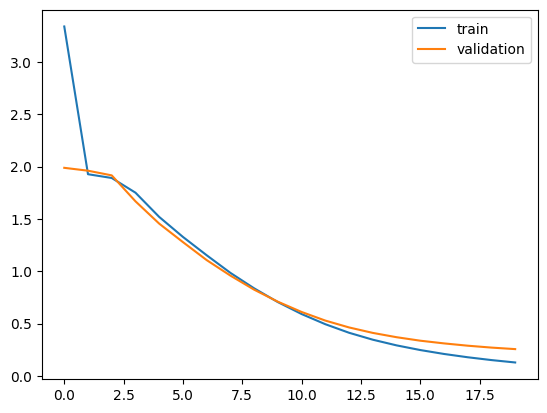

In [321]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [322]:
model.save('model_lstm.keras')

In [323]:
preds = model.predict([X_test, y_test.reshape(y_test.shape[0], y_test.shape[1], 1)])

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


# Model Inference

In [324]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [325]:
def decode_sequences(tokenizer, sequences):
    decoded_texts = []
    for sequence in sequences:
        decoded_words = []
        for int_val in sequence:
            word = get_word(int_val, tokenizer)
            if word is not None:
                decoded_words.append(word)
        decoded_texts.append(' '.join(decoded_words))
    return decoded_texts

In [326]:
preds_text = []

for i, pred in enumerate(preds):
    temp = []
    for j, token_probs in enumerate(pred):
        predicted_word_index = np.argmax(token_probs)
        t = get_word(predicted_word_index, indo_tokenizer)
        if j > 0:
            if (t == get_word(np.argmax(pred[j-1]), indo_tokenizer)) or (t is None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if t is None:
                temp.append('')
            else:
                temp.append(t)

    preds_text.append(' '.join(temp))

In [327]:
decoded_texts = decode_sequences(indo_tokenizer,y_test)
decoded_texts

['dan jika tanganmu yang kanan menyesatkan engkau penggallah dan buanglah itu karena lebih baik bagimu jika satu dari anggota tubuhmu binasa dari pada tubuhmu dengan utuh masuk neraka',
 'sebab aku telah memutuskan untuk tidak mengetahui apaapa di antara kamu selain yesus kristus yaitu dia yang disalibkan',
 'orang yang menyerahkan dia telah memberitahukan tanda ini kepada mereka orang yang akan kucium itulah dia tangkaplah dia',
 'tetapi karena ia tetap selamalamanya imamatnya tidak dapat beralih kepada orang lain',
 'sebab jika pelayanan yang memimpin kepada penghukuman itu mulia betapa lebih mulianya lagi pelayanan yang memimpin kepada pembenaran',
 'engkau tentu mengetahui segala perintah allah jangan membunuh jangan berzinah jangan mencuri jangan mengucapkan saksi dusta jangan mengurangi hak orang hormatilah ayahmu dan ibumu',
 'janganlah kamu mengasihi dunia dan apa yang ada di dalamnya jikalau orang mengasihi dunia maka kasih akan bapa tidak ada di dalam orang itu',
 'maka datan

In [328]:
for pred, actual in zip(preds_text, decoded_texts):
    print("Predicted:", pred)
    print("Actual:", actual)
    print()  # Print a blank line for better readability

Predicted: dan jika tanganmu yang timur menyesatkan engkau penggallah dan buanglah itu karena lebih baik bagimu jika satu dari anggota tubuhmu binasa dari pada tubuhmu dengan utuh masuk neraka                                        
Actual: dan jika tanganmu yang kanan menyesatkan engkau penggallah dan buanglah itu karena lebih baik bagimu jika satu dari anggota tubuhmu binasa dari pada tubuhmu dengan utuh masuk neraka

Predicted: sebab aku telah memutuskan untuk tidak mengetahui apaapa di antara kamu selain yesus kristus yaitu dia yang disalibkan                                                  
Actual: sebab aku telah memutuskan untuk tidak mengetahui apaapa di antara kamu selain yesus kristus yaitu dia yang disalibkan

Predicted: orang yang menyerahkan dia telah memberitahukan tanda ini kepada mereka orang yang akan kuberi itulah dia tangkaplah dia                                                  
Actual: orang yang menyerahkan dia telah memberitahukan tanda ini kepada mereka orang 

In [329]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

In [330]:
actual

'tetapi ada di antara mereka yang berkata ia mengusir setan dengan kuasa beelzebul penghulu setan'

In [331]:
# actual = nltk.word_tokenize('hal itu terjadi dari pihak tuhan suatu perbuatan ajaib di mata kita lanjutkan itu  dan ')
# pred = nltk.word_tokenize('hal itu terjadi dari pihak tuhan suatu perbuatan ajaib di mata kita')

references = [actual]

# Calculate BLEU score
bleu_score = sentence_bleu(references, pred)
print(f'Sentence BLEU score: {bleu_score:.2f}')

Sentence BLEU score: 0.57


In [332]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
import numpy as np

def preprocess_text(text):
    return set(word_tokenize(text.lower()))

def calculate_exact_match_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def calculate_token_level_metrics(y_true, y_pred):
    true_tokens = [preprocess_text(text) for text in y_true]
    pred_tokens = [preprocess_text(text) for text in y_pred]

    tp, fp, fn = 0, 0, 0
    for true, pred in zip(true_tokens, pred_tokens):
        tp += len(true.intersection(pred))
        fp += len(pred - true)
        fn += len(true - pred)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

def calculate_bleu_score(y_true, y_pred):
    bleu_scores = []
    for true, pred in zip(y_true, y_pred):
        reference = [word_tokenize(true.lower())]
        candidate = word_tokenize(pred.lower())
        bleu_scores.append(sentence_bleu(reference, candidate))
    return np.mean(bleu_scores)

def evaluate_translation(y_true, y_pred):
    exact_match_accuracy = calculate_exact_match_accuracy(y_true, y_pred)
    precision, recall, f1 = calculate_token_level_metrics(y_true, y_pred)
    bleu_score = calculate_bleu_score(y_true, y_pred)

    return {
        'Exact Match Accuracy': exact_match_accuracy,
        'Token-level Precision': precision,
        'Token-level Recall': recall,
        'Token-level F1 Score': f1,
        'BLEU Score': bleu_score
    }

# Example usage
results = evaluate_translation(decoded_texts, preds_text)
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Exact Match Accuracy: 0.0000
Token-level Precision: 0.9153
Token-level Recall: 0.9157
Token-level F1 Score: 0.9155
BLEU Score: 0.8116
